## Adiabatic parameter requirements for no depolarization
Emma Klemets   
Sept. 2022   
Full documentation of the theory can be found at: https://www.overleaf.com/read/rfkkhhwwfjct

This is looking at what the resulting polarization is for different values of k, the adiabatic parameter. All these results do not have B or $v_n$ or $\Omega$ as an input, as all these values come into play only determining the value of k.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as const

import matplotlib as mpl

In [21]:
#importing physical constants that are useful from scipy.constants
m_p = const.physical_constants['proton mass energy equivalent in MeV'][0]
m_n = const.physical_constants['neutron mass energy equivalent in MeV'][0]
c = const.c #m/s
hbar = const.hbar

mu_n = const.physical_constants['neutron mag. mom.'][0] #J T^-1
g_n = const.physical_constants['neutron mag. mom. to nuclear magneton ratio'][0]
gamma_n = const.physical_constants['neutron gyromag. ratio'][0] #s^-1 T^-1,
#Derek thought: correction for frequency - should still check this with someone else
# /(2*np.pi) #s^-1 T^-1, negative

## The Adiabatic parameter for straight paths
A quick little graph for non-rotating spin transport. Here the equation is:

$$
P = 1 - e^{-\pi k}
$$

Assuming first that the field is mainly along the axis of the neutron guide, $B_{\|} \gg B_{\perp}$, the probably of depolarization, decreases exponentially with k.

In [22]:
#for P> 99%:
k, P_s = sp.symbols("k, P_s")
# P_straight = sp.Function("P_{s}")(k)

Pstraight = sp.Eq(P_s, 1-sp.exp(-sp.pi*k))
Pstraight

Eq(P_s, 1 - exp(-pi*k))

In [23]:
Pstraight_k, = sp.solve(Pstraight, k)
display(sp.Eq(k, Pstraight_k))

P_95 = float(Pstraight_k.replace(P_s, .95))
P_98 = float(Pstraight_k.replace(P_s, .98))
P_99 = float(Pstraight_k.replace(P_s, .99))
P_999 = float(Pstraight_k.replace(P_s, .999))

print("For P = .99:")
display(sp.Eq(sp.Eq(k, Pstraight_k.replace(P_s, .99)), P_99, evaluate=False))

Eq(k, log(-1/(P_s - 1))/pi)

For P = .99:


Eq(Eq(k, 4.60517018598809/pi), 1.46587119775886)

In [24]:
Pstraight_k, = sp.solve(Pstraight, k)
# display(sp.Eq(k, Pstraight_k))
percent = .998

P_q = float(Pstraight_k.replace(P_s, percent))

print(f"For P = {percent*100} %")
display(sp.Eq(sp.Eq(k, Pstraight_k.replace(P_s, percent)), P_q, evaluate=False))

For P = 99.8 %


Eq(Eq(k, 6.21460809842219/pi), 1.97817119648563)

In [25]:
#plotting the polarization along the intial axis in terms of k
def P_straight(k):
    return 1-np.exp(-np.pi*k)

plt.rcParams.update({'font.size': 17})

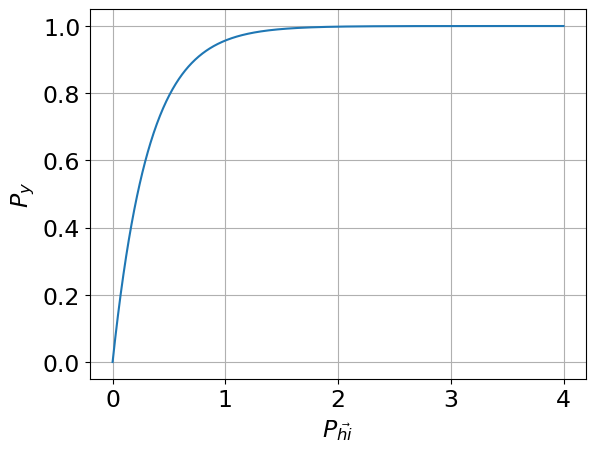

In [26]:
k_arr = np.linspace(0, 4, 1000)

plt.plot(k_arr, P_straight(k_arr))
# plt.title("Resulting polarization from $P^y_0 = +1$ for a given $k$")

plt.xlabel('$k$')
plt.ylabel('$P_y$')
plt.grid()
# plt.savefig('thesisPlots/Kgraphs_analytic_straight.pdf', bbox_inches="tight")
plt.show()

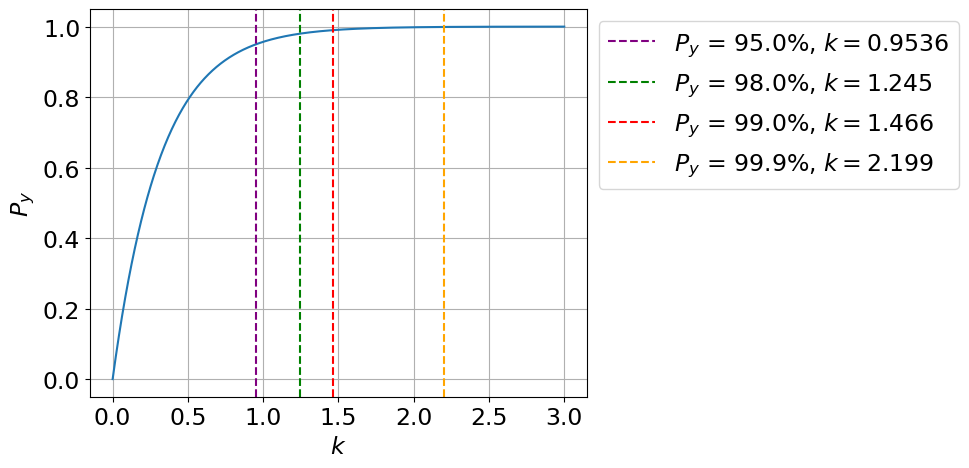

In [27]:
#plotting the polarization along the intial axis in terms of k
plt.rcParams.update({'font.size': 17})
fig = plt.figure(figsize=(10, 5))

k_arr = np.linspace(0, 3, 1000)
# plt.rcParams.update({'font.size': 12})

plt.plot(k_arr, P_straight(k_arr))
plt.axvline(x=P_95, color='purple', linestyle='--', label=f"$P_y$ = 95.0%, $k={P_95:.4}$")
plt.axvline(x=P_98, color='g', linestyle='--', label=f"$P_y$ = 98.0%, $k={P_98:.4}$")
plt.axvline(x=P_99, color='r', linestyle='--', label=f"$P_y$ = 99.0%, $k={P_99:.4}$")
plt.axvline(x=P_999, color='orange', linestyle='--', label=f"$P_y$ = 99.9%, $k={P_999:.4}$")

# plt.title("Values of $k$ for specific polarization along intial axis")
# plt.title("Resulting polarization from $P^y_0 = +1$ for a given $k$")

plt.xlabel('$k$')
plt.ylabel('$P_y$')
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1), loc="upper left")
plt.tight_layout()

plt.savefig('thesisPlots/Kgraphs_req_straight.pdf')
# plt.savefig('Photos/Kgraphs_req_straight.pdf')
plt.show()

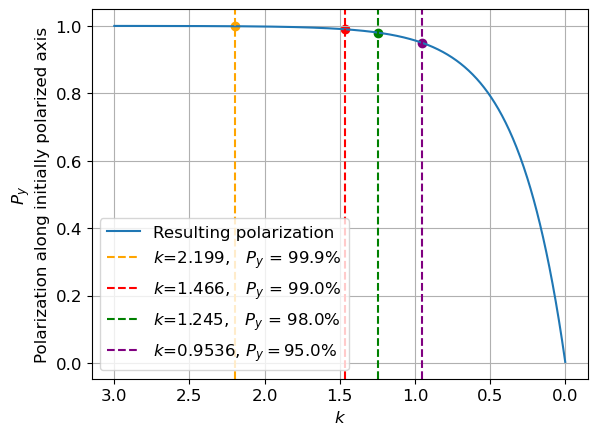

In [28]:
k_arr = np.linspace(1e-3, 3, 1000)
plt.rcParams.update({'font.size': 12})
# print( P_straight(k_arr))

plt.plot(k_arr, P_straight(k_arr), label="Resulting polarization")

# plt.plot(k_arr, P_straight(k_arr), label="Resulting polarization from $P^y_0=+1$ for a given $k$")

plt.axvline(x=P_999, color='orange', linestyle='--', label=f"$k$={P_999:.4},   $P_y$ = 99.9%")
plt.axvline(x=P_99, color='r', linestyle='--', label=f"$k$={P_99:.4},   $P_y$ = 99.0%")
plt.axvline(x=P_98, color='g', linestyle='--', label=f"$k$={P_98:.4},   $P_y$ = 98.0%")
plt.axvline(x=P_95, color='purple', linestyle='--', label=f"$k$={P_95:.4}, $P_y = 95.0\%$")

plt.scatter(P_999, .999, color='orange')
plt.scatter(P_99, .99, color='r')
plt.scatter(P_98, .98, color='g')
plt.scatter(P_95, .95, color='purple')


# plt.title("Values of $k$ for specific polarization along intial axis")
# plt.title("Resulting polarization from $P^y_0 = +1$ for a given $k$")

plt.xlabel('$k$')
plt.ylabel('$P_y$ \nPolarization along initially polarized axis')
plt.grid()
plt.legend()
plt.gca().invert_xaxis()
# plt.ylim(0.5)

plt.savefig('Photos/Kgraphs_req_straight_log.pdf')
plt.show()

## The Adiabatic parameter for rotating paths

Final expressions for $P(k)$ after a $\theta$ rotation of the magnetic field. 

In [29]:
def Px(theta, k):
    return k*(1-np.cos(theta*np.sqrt(1+k**2))) / (1+k**2)

def Py(theta, k):
    return (np.cos(theta)*(k**2 + np.cos(theta*np.sqrt(1+k**2))) + \
            np.sqrt(1+k**2)*np.sin(theta)*np.sin(theta*np.sqrt(1+k**2)) )/ (1+k**2)

def Pz(theta, k):
    return np.sin(theta)*(k**2 + np.cos(theta*np.sqrt(1+k**2)))/(1+k**2) - \
           np.cos(theta)*np.sin(theta*np.sqrt(1+k**2))/np.sqrt(1+k**2)

def P_vec(theta, k, LFS=False):
    if LFS:
        P_vector = [Px(theta, k), -Py(theta, k), -Pz(theta, k)]

    else:
        P_vector = [Px(theta, k), Py(theta, k), Pz(theta, k)]
        
    return np.array(P_vector)

def P_tot(theta, k): #this should just stay at 1, which it does
    return np.sqrt( Px(theta, k)**2 +  Py(theta, k)**2 +  Pz(theta, k)**2)


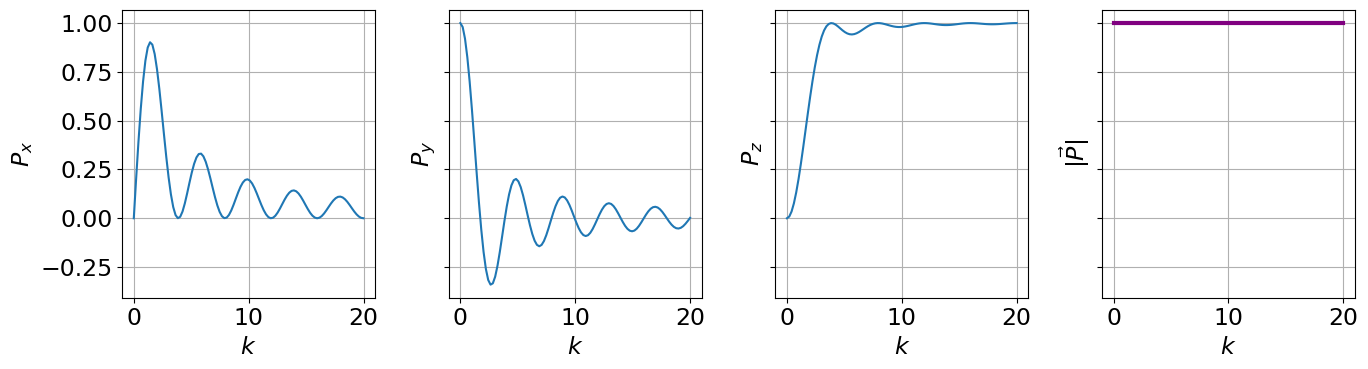

In [30]:
plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(1, 4, figsize=(14,4), sharex=True, sharey=True)

k_arr = np.linspace(0, 20, 100)

t = np.pi/2
theta_arr_lab = "\dfrac{\pi}{2}"
direction = [0,1,2]
direction_lab = ["P_x", "P_y", "P_z"]
#for switching between high and low field seeker intial polarization
LFS_arr = [False, True]
intial_P = [[0, 1, 0]]#, [0, -1, 0]]
intial_P_arr = ["$+y$", "$-y$"]
seekers_arr = ["HFS", "LFS"]

wanted_final_P = [[0, 0, 1],[0, 0, -1]]

j = 0
for P in intial_P:
    
    for i in direction:
        axs[i].plot(k_arr, P_vec(t, k_arr, LFS_arr[j])[i])
        # axs[i].axhline(y=P[i], color='r', linestyle=':', label="Initial polarization")
        # axs[i].axhline(y=wanted_final_P[j][i], color='orange', linestyle='-.', 
        #                   label="Desired final polarization")
        axs[i].set_ylabel(f"${direction_lab[i]}$")
        axs[i].grid()
        
    j += 1
    
    
Pmag = np.sqrt(P_vec(t, k_arr, LFS_arr[0])[0]**2 +P_vec(t, k_arr, LFS_arr[0])[1]**2 
               + P_vec(t, k_arr, LFS_arr[0])[2]**2)

axs[3].plot(k_arr, Pmag, color='purple', linewidth=3)
axs[3].set_xlabel('k')
axs[3].set_ylabel('$|\\vec{P}|$')
axs[3].grid()


# axs[2].legend()
axs[0].set_xlabel("$k$")
axs[1].set_xlabel("$k$")
axs[2].set_xlabel("$k$")
axs[3].set_xlabel("$k$")

plt.tight_layout()
plt.savefig('thesisPlots/Kgraphs_analytic.pdf')

plt.show()

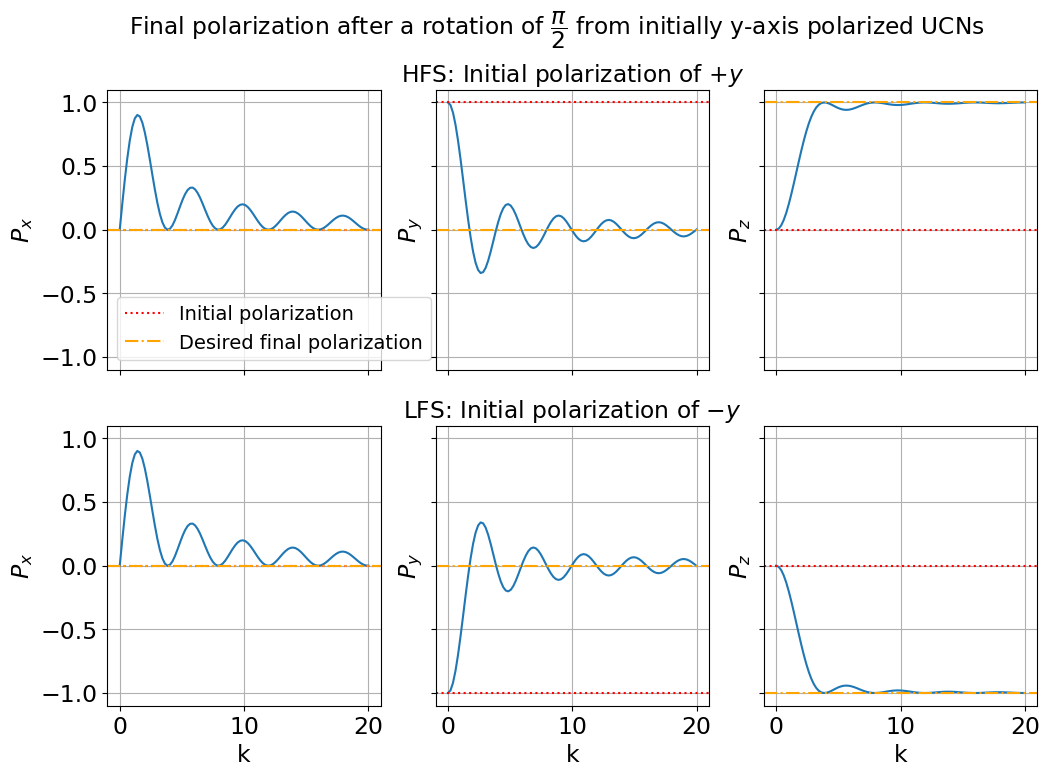

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(12,8), sharex=True, sharey=True)
plt.rcParams.update({'font.size': 14})

plt.suptitle("Final polarization after a rotation of $\dfrac{\pi}{2}$ from initially y-axis polarized UCNs")
k_arr = np.linspace(0, 20, 100)

t = np.pi/2
theta_arr_lab = "\dfrac{\pi}{2}"
direction = [0,1,2]
direction_lab = ["P_x", "P_y", "P_z"]
#for switching between high and low field seeker intial polarization
LFS_arr = [False, True]
intial_P = [[0, 1, 0], [0, -1, 0]]
intial_P_arr = ["$+y$", "$-y$"]
seekers_arr = ["HFS", "LFS"]

wanted_final_P = [[0, 0, 1],[0, 0, -1]]

j = 0
for P in intial_P:
    axs[j, 1].set_title("{}: Initial polarization of {}".format(seekers_arr[j], intial_P_arr[j]))
    
    for i in direction:
        axs[j, i].plot(k_arr, P_vec(t, k_arr, LFS_arr[j])[i])
        axs[j, i].axhline(y=P[i], color='r', linestyle=':', label="Initial polarization")
        axs[j, i].axhline(y=wanted_final_P[j][i], color='orange', linestyle='-.', 
                          label="Desired final polarization")
        axs[j, i].set_ylabel(f"${direction_lab[i]}$")
        axs[j, i].grid()
        
    j += 1

axs[0,0].legend()
axs[1,0].set_xlabel("k")
axs[1,1].set_xlabel("k")
axs[1,2].set_xlabel("k")
# plt.tight_layout()
plt.savefig('Photos/Kgraphs_2.pdf')

plt.show()

In [32]:
Px_sy, Py_sy, Pz_sy = sp.symbols("P_x, P_y, P_z")
P_0 = sp.symbols("P_0")

Protating_x = sp.Eq(Px_sy, P_0*k*(1 - sp.cos(sp.pi*sp.sqrt(k**2 + 1)/2))/(k**2 + 1))
Protating_y = sp.Eq(Py_sy, P_0*sp.sin(sp.pi*sp.sqrt(k**2 + 1)/2)/sp.sqrt(k**2 + 1))
Protating_z = sp.Eq(Pz_sy, P_0*(k**2 + sp.cos(sp.pi*sp.sqrt(k**2 + 1)/2))/(k**2 + 1))

Protating_z = Protating_z.replace(P_0, 1)
display(Protating_z)
Protating_z_np = sp.lambdify([k], Protating_z.rhs, modules=['numpy'])

lotsK = np.linspace(0, 30, 1000000)
# print(lotsK)

Pz_ofK = Protating_z_np(lotsK)
dk = 0.00001

# precent = [95.0, 98.0, 99.0, 99.5, 99.8]
precent = [95.0, 98.0, 99.0,99.8]

zArr = []
for Per in precent:
    p_check = Per/100
    zArr.append(lotsK[np.where((p_check - dk <= Pz_ofK) & (Pz_ofK <= p_check + dk))])



Eq(P_z, (k**2 + cos(pi*sqrt(k**2 + 1)/2))/(k**2 + 1))

In [33]:
# #for P> 99%:
# Px_sy, Py_sy, Pz_sy = sp.symbols("P_x, P_y, P_z")
# P_0 = sp.symbols("P_0")
# b = sp.symbols("b")

# Protating_x = sp.Eq(Px_sy, P_0*k*(1 - sp.cos(sp.pi*sp.sqrt(k**2 + 1)/2))/(k**2 + 1) - b)
# Protating_y = sp.Eq(Py_sy, P_0*sp.sin(sp.pi*sp.sqrt(k**2 + 1)/2)/sp.sqrt(k**2 + 1) - b)
# Protating_z = sp.Eq(Pz_sy, P_0*(k**2 + sp.cos(sp.pi*sp.sqrt(k**2 + 1)/2))/(k**2 + 1) - b)

# # ou can convert your sympy solution to a numpy-based function, and use scipy to solve numerically.
# from scipy.optimize import fsolve

# Protating_z = Protating_z.replace(P_0, 1)
# display(Protating_z)
# Protating_z_np = sp.lambdify([k, b], Protating_z.rhs, modules=['numpy'])

# # print(Protating_z_np(0.1))
# precent = [95, 99, 99.9]
# zArr = []
# for Per in precent:
#     #this solves for roots, which is not what I want
#     zArr.append(fsolve(Protating_z_np, x0=[7.23972397, 8.80588059], args=Per/100))
    
# print(zArr)

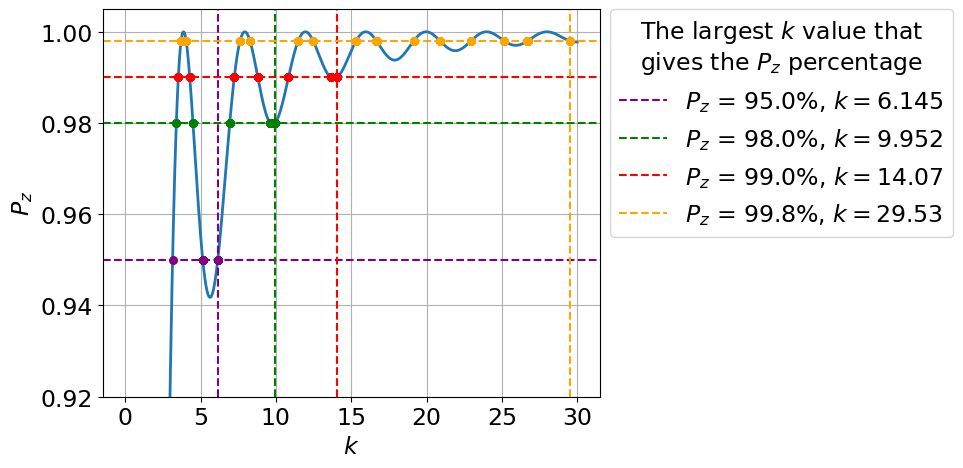

In [40]:
plt.rcParams.update({'font.size': 17})
# fig = plt.figure(figsize=(10, 5))

fig, ax1 = plt.subplots(1,1, figsize=(10,5), sharex=True, sharey=True)
# plt.suptitle("Final polarization after a rotation of $\dfrac{\pi}{2}$ from initially $+y$ polarized UCNs")
# Values of $k$ 

colorArr = ['purple', 'g', 'r', 'orange', 'blue']

j = 0
i = 2

ax1.plot(lotsK, P_vec(t, lotsK, LFS_arr[j])[i], linewidth=2)
ax1.set_ylabel(f"${direction_lab[i]}$")
ax1.grid()
if i==2:
    for n, Per in enumerate(precent):

        ax1.axhline(y=Per/100, color=colorArr[n], linestyle='--', alpha=1)
#                           label=f"$P_y$ = {Per}%", alpha=0.4) #, k={v:.4}")
        ax1.scatter(zArr[n], Per/100*np.ones(len(zArr[n])), marker='o',
                    s=25, color=colorArr[n], zorder=10)
    
        ax1.axvline(x=zArr[n][-1], color=colorArr[n], linestyle='--', 
                    label=f"$P_z$ = {Per}%, $k={zArr[n][-1]:.4}$")

ax1.legend(title="The largest $k$ value that \ngives the $P_z$ percentage", 
           bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax1.set_ylim(0.92, 1.005)
ax1.set_xlabel("$k$")
plt.tight_layout()
plt.savefig('thesisPlots/Kgraphs_req.pdf')
# plt.savefig('Photos/Kgraphs_req.pdf')
plt.show()

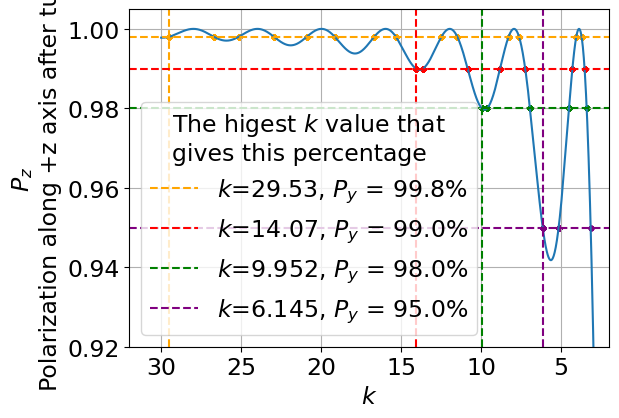

In [35]:
fig, ax1 = plt.subplots(1,1, figsize=(6.5,4.5))
# plt.suptitle("Final polarization after a rotation of $90^\circ$ from initially $+y$ polarized UCNs")
# Values of $k$ 

colorArr = ['purple', 'g', 'r', 'orange', 'blue']

j = 0
i = 2

ax1.plot(lotsK, P_vec(t, lotsK, LFS_arr[j])[i])
ax1.set_ylabel(f"${direction_lab[i]}$ \nPolarization along +z axis after turn")
ax1.grid()
if i==2:
    for n, Per in enumerate(precent[::-1]):
        # print(n, Per)
        n = 3-n

        ax1.axhline(y=Per/100, color=colorArr[n], linestyle='--', alpha=1)
#                           label=f"$P_y$ = {Per}%", alpha=0.4) #, k={v:.4}")
        ax1.scatter(zArr[n], Per/100*np.ones(len(zArr[n])), marker='o',  s=10, color=colorArr[n])
    
        ax1.axvline(x=zArr[n][-1], color=colorArr[n], linestyle='--', 
                    label=f"$k$={zArr[n][-1]:.4}, $P_y$ = {Per}%")

ax1.legend(title="The higest $k$ value that \ngives this percentage") 
           # bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax1.set_ylim(0.92, 1.005)
ax1.set_xlabel("$k$")
plt.tight_layout()
# plt.yscale("log")
plt.xlim(2, 32)

plt.gca().invert_xaxis()

plt.savefig('Photos/Kgraphs_req2.pdf')
plt.show()

In [36]:
#I think this plot is really too messy to look at, I like the one above better
fig, axs = plt.subplots(2, 3, figsize=(12,8), sharex=True, sharey=True)
plt.rcParams.update({'font.size': 11})

plt.suptitle("Final polarization after a rotation of $\dfrac{\pi}{2}$ from initially y-axis polarized UCNs")
# Values of $k$ 

colorArr = ['purple', 'g', 'r', 'orange', 'blue']

j = 0
for P in intial_P:
    axs[j, 0].set_title("{}: Initial polarization of {}".format(seekers_arr[j], intial_P_arr[j]))
    
    for i in direction:
        axs[j, i].plot(k_arr, P_vec(t, k_arr, LFS_arr[j])[i])
        axs[j, i].set_ylabel(direction_lab[i])
        axs[j, i].grid()
        if i==2:
            for n, Per in enumerate(precent):
    #             print(zArr[n])
                for v in zArr[n]:
                    axs[j, i].axvline(x=v, color=colorArr[n], linestyle='--', \
                                  label=f"$P_y$ = {Per}%") #, k={v:.4}")
        
    j += 1
    
#removes repeated labels so this doesn't look silly
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# print(by_label)
axs[0,2].legend(by_label.values(), by_label.keys())

# axs[0,2].legend()
axs[1,0].set_xlabel("k")
axs[1,1].set_xlabel("k")
axs[1,2].set_xlabel("k")
plt.tight_layout()
# plt.savefig('Photos/Kgraphs_req2.pdf')
plt.show()

C:\Users\Emma\AppData\Local\Temp\ipykernel_14400\2146234591.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)

KeyboardInterrupt



## Transition region

To look at the polarization for different values of k throughout the rotation, as a function of the angle

In [ ]:
theta_arr = np.linspace(0, np.pi/2)

k_choices = np.array([5, 8, 10, 12, 15, 25, 1000])

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharex=True, sharey=True)
plt.rcParams.update({'font.size': 14})

plt.suptitle("Polarization during the transition region as a function of angle rotated [$\\theta$],\n"+
            "for initially +y-axis polarized UCNs")
# cmap = plt.cm.get_cmap('tab20')  # type: matplotlib.colors.ListedColormap
# colors = cmap.colors  # type: list
colors = ['skyblue', 'deepskyblue', 'royalblue', 'blueviolet', 'fuchsia', 'red', 'black']

for j, k_i in enumerate(k_choices):
    
    for i in direction:
        axs[i].plot(theta_arr, P_vec(theta_arr, k_i)[i], label=f"k = {k_i}", color=colors[j])
        axs[i].set_ylabel(f"${direction_lab[i]}$")

axs[0].set_xticks([0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2])
axs[0].set_xticklabels(['0','$\\frac{\\pi}{8}$','$\\frac{\\pi}{4}$', '$\\frac{3\\pi}{8}$','$\\frac{\\pi}{2}$'], size=14)
axs[0].grid()
axs[1].grid()
axs[2].grid()

axs[0].legend()
axs[0].set_xlabel("Rotation by $\\theta$")
axs[1].set_xlabel("Rotation by $\\theta$")
axs[2].set_xlabel("Rotation by $\\theta$")
plt.tight_layout()
plt.savefig('Photos/Kgraphs_functofTheta.pdf')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharex=True, sharey=True)

plt.rcParams.update({'font.size': 17})
theta_arr = np.linspace(0, np.pi/2)

# plt.suptitle("Polarization during the transition region as a function of angle rotated [$\\theta$],\n"+
#             "for initially +y-axis polarized UCNs")

k_choices_big = np.linspace(0,15)
# k_choices_big = np.linspace(10,150)

c = k_choices_big
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

for j, k_i in enumerate(k_choices_big):
    
    for i in direction:
        axs[i].plot(theta_arr, P_vec(theta_arr, k_i)[i], c=cmap.to_rgba(k_i + 1), label=f"k = {k_i}")#, color=colors[j])
        axs[i].set_ylabel(f"${direction_lab[i]}$")

axs[0].set_xticks([0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2])
axs[0].set_xticklabels(['0','$\\frac{\\pi}{8}$','$\\frac{\\pi}{4}$', 
                        '$\\frac{3\\pi}{8}$','$\\frac{\\pi}{2}$'], size=17)

axs[0].set_xticks([0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2])
axs[0].set_xticklabels(['0','$\\frac{\\pi}{8}$','$\\frac{\\pi}{4}$', 
                        '$\\frac{3\\pi}{8}$','$\\frac{\\pi}{2}$'], size=17)
axs[0].grid()
axs[1].grid()
axs[2].grid()
fig.colorbar(cmap, ax=axs[2], label='$k$ value')

# axs[0].legend()
axs[0].set_xlabel("Rotation by $\\theta$")
axs[1].set_xlabel("Rotation by $\\theta$")
axs[2].set_xlabel("Rotation by $\\theta$")
plt.tight_layout()

# plt.savefig('thesisPlots/PfunctOfTheta_rainbow.pdf')
# plt.savefig('Photos/Kgraphs_functofTheta.pdf')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharex=True, sharey=True)

plt.rcParams.update({'font.size': 17})
theta_arr = np.linspace(0, np.pi*2)

# plt.suptitle("Polarization during the transition region as a function of angle rotated [$\\theta$],\n"+
#             "for initially +y-axis polarized UCNs")

k_choices_big = np.linspace(0,15)
# k_choices_big = np.linspace(10,150)

c = k_choices_big
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

for j, k_i in enumerate(k_choices_big):
    
    for i in direction:
        axs[i].plot(theta_arr, P_vec(theta_arr, k_i)[i], c=cmap.to_rgba(k_i + 1), 
                    alpha=0.5, linewidth=4)
        axs[i].set_ylabel(f"${direction_lab[i]}$")

        
for i in direction:
    axs[i].plot(theta_arr, P_vec(theta_arr, 10000)[i], c='silver', 
        label='$k \\rightarrow \infty $', alpha=1, ls="--", linewidth=3)#, color=colors[j])
        
# axs[0].set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi,  5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi])
# axs[0].set_xticklabels(['0', '$\\frac{\\pi}{4}$','$\\frac{\\pi}{2}$',  '$\\frac{3\\pi}{4}$',
#                         '$\pi$', '$\\frac{5\\pi}{4}$','$\\frac{3\\pi}{2}$',  
#                         '$\\frac{3\\pi}{4}$', '$2\pi$'], size=17)

axs[0].set_xticks([0, np.pi/2, np.pi,  3*np.pi/2, 2*np.pi])
axs[0].set_xticklabels(['0','$\\frac{\\pi}{2}$',  
                        '$\pi$', '$\\frac{3\\pi}{2}$', '$2\pi$'], size=17)
axs[0].grid()
axs[1].grid()
axs[2].grid()
fig.colorbar(cmap, ax=axs[2], label='$k$ value')

axs[0].legend()
axs[0].set_xlabel("Rotation by $\\theta$")
axs[1].set_xlabel("Rotation by $\\theta$")
axs[2].set_xlabel("Rotation by $\\theta$")
plt.tight_layout()

plt.savefig('thesisPlots/PfunctOfTheta_rainbowFullRange.pdf')
# plt.savefig('Photos/Kgraphs_functofTheta.pdf')
plt.show()

In [ ]:
#looking at just the top corner
fig, axs = plt.subplots(1, 3, figsize=(12, 6))#, sharex=True, sharey=True)
plt.rcParams.update({'font.size': 14})

# plt.suptitle("Polarization during the transition region as a function of angle rotated [$\\theta$],\n"+
#             "for initially +y-axis polarized UCNs")

theta_arr = np.linspace(np.pi/2 * 0.95, np.pi/2)
# k_choices_big = np.linspace(0,15)
k_choices_big = np.linspace(10,20)

c = k_choices_big
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

for j, k_i in enumerate(k_choices_big):
    
    for i in direction:
        axs[i].plot(theta_arr, P_vec(theta_arr, k_i)[i], 
                    c=cmap.to_rgba(k_i + 1), label=f"k = {k_i}")#, color=colors[j])
        axs[i].set_ylabel(f"${direction_lab[i]}$")

# axs[0].set_xticks([0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2])
# axs[0].set_xticklabels(['0','$\\frac{\\pi}{8}$','$\\frac{\\pi}{4}$', '$\\frac{3\\pi}{8}$','$\\frac{\\pi}{2}$'], size=14)

axs[0].grid()
axs[1].grid()
axs[2].grid()
fig.colorbar(cmap, ax=axs[2], label='$k$ value')

# axs[0].legend()
axs[0].set_xlabel("Rotation by $\\theta$")
axs[1].set_xlabel("Rotation by $\\theta$")
axs[2].set_xlabel("Rotation by $\\theta$")
plt.tight_layout()
# plt.savefig('Photos/Kgraphs_functofTheta.pdf')
plt.show()

## Work on combining the two equations

In [ ]:
def combinedP(theta, k, LFS=False):
    P_tot = P_vec(theta, k, LFS=LFS) * (1-np.exp(-np.pi*k))
    
    return P_tot

In [ ]:
# combinedP(theta, k)

In [ ]:
plt.rcParams.update({'font.size': 16})
# fig, axs = plt.subplots(1, 4, figsize=(14,4), sharex=True, sharey=True)
fig, axs = plt.subplots(2,2, figsize=(7,7), sharex=True, sharey=True)
axs = axs.flatten()

k_arr = np.linspace(0, 5, 100)

t = np.pi/2
theta_arr_lab = "\dfrac{\pi}{2}"
direction = [0,1,2]
direction_lab = ["P_x", "P_y", "P_z"]
#for switching between high and low field seeker intial polarization
LFS_arr = [False, True]
intial_P = [[0, 1, 0]]#, [0, -1, 0]]
intial_P_arr = ["$+y$", "$-y$"]
seekers_arr = ["HFS", "LFS"]

wanted_final_P = [[0, 0, 1],[0, 0, -1]]

j = 0
for P in intial_P:
    
    for i in direction:
        axs[i].plot(k_arr, combinedP(t, k_arr, LFS_arr[j])[i], label="Combined $P_{tot}$", 
                    linewidth=3, color = 'C0',)
        axs[i].plot(k_arr, P_vec(t, k_arr, LFS_arr[j])[i], label="Only P($k$, $\\theta$)", 
                    color = 'orangered', ls='--', linewidth=3,)
        
        # axs[i].axhline(y=P[i], color='black', linestyle=':', label="Initial\npolarization")
        axs[i].axhline(y=P[i], color='black', linestyle=':')
        # axs[i].axhline(y=wanted_final_P[j][i], color='orange', linestyle='-.', 
        #                   label="Desired final polarization")
        axs[i].set_ylabel(f"${direction_lab[i]}$")
        axs[i].grid()
        
    j += 1
    
Pmag = np.sqrt(combinedP(t, k_arr, LFS_arr[0])[0]**2 +combinedP(t, k_arr, LFS_arr[0])[1]**2 
               + combinedP(t, k_arr, LFS_arr[0])[2]**2)
axs[3].plot(k_arr, Pmag, color='C0', linewidth=3, label="Combined $P_{tot}$")

Pmag = np.sqrt(P_vec(t, k_arr, LFS_arr[0])[0]**2 +P_vec(t, k_arr, LFS_arr[0])[1]**2 
               + P_vec(t, k_arr, LFS_arr[0])[2]**2)
axs[3].plot(k_arr, Pmag, color='orangered', linewidth=3, label="Only P($k$, $\\theta$)", ls='--')

axs[3].set_xlabel('k')
axs[3].set_ylabel('$|\\vec{P}|$')
axs[3].grid()

plt.suptitle("Final polarization after a rotation of $90^\circ$ of \ninitially $+y$ polarized UCNs")

# axs[2].legend()
axs[3].legend()

# axs[0].set_xlabel("$k$")
# axs[1].set_xlabel("$k$")
axs[2].set_xlabel("$k$")
axs[3].set_xlabel("$k$")

plt.tight_layout()
# plt.savefig('thesisPlots/Kgraphs_analytic_combined.pdf', transparent=True)
# plt.savefig('thesisPlots/Kgraphs_analytic_combined.png', transparent=True)

plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharex=True, sharey=True)

plt.rcParams.update({'font.size': 17})
theta_arr = np.linspace(0, np.pi/2)

# k_choices_big = np.linspace(0,15, 5)
k_choices_big = np.linspace(0, 4, 10)


c = k_choices_big
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

cmap2 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.ocean)
cmap2.set_array([])

for j, k_i in enumerate(k_choices_big):
    
    for i in direction:
        axs[i].plot(theta_arr, combinedP(theta_arr, k_i)[i], c=cmap.to_rgba(k_i + 1), 
                    label=f"k = {k_i}")
        axs[i].plot(theta_arr, P_vec(theta_arr, k_i)[i], c=cmap2.to_rgba(k_i + 1), 
                    label=f"k = {k_i}", alpha=0.5, ls='--')
        
        axs[i].set_ylabel(f"${direction_lab[i]}$")

axs[0].set_xticks([0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2])
axs[0].set_xticklabels(['0','$\\frac{\\pi}{8}$','$\\frac{\\pi}{4}$', 
                        '$\\frac{3\\pi}{8}$','$\\frac{\\pi}{2}$'], size=17)

axs[0].set_xticks([0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2])
axs[0].set_xticklabels(['0','$\\frac{\\pi}{8}$','$\\frac{\\pi}{4}$', 
                        '$\\frac{3\\pi}{8}$','$\\frac{\\pi}{2}$'], size=17)
axs[0].grid()
axs[1].grid()
axs[2].grid()
fig.colorbar(cmap, ax=axs[2], label='$k$ value - combined')

fig.colorbar(cmap2, ax=axs[0], label='$k$ value only turn', alpha=0.5)


# axs[0].legend()
axs[0].set_xlabel("Rotation by $\\theta$")
axs[1].set_xlabel("Rotation by $\\theta$")
axs[2].set_xlabel("Rotation by $\\theta$")
plt.tight_layout()
# plt.savefig('thesisPlots/PfunctOfTheta_rainbow.pdf')
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 17})
# fig = plt.figure(figsize=(10, 5))

fig, ax1 = plt.subplots(1,1, figsize=(10,5), sharex=True, sharey=True)
# plt.suptitle("Final polarization after a rotation of $\dfrac{\pi}{2}$ from initially $+y$ polarized UCNs")
# Values of $k$ 

colorArr = ['purple', 'g', 'r', 'orange', 'blue']

j = 0
i = 2

ax1.plot(lotsK, combinedP(t, lotsK, LFS_arr[j])[i], linewidth=2, label="Combined")
ax1.plot(lotsK, P_vec(t, lotsK, LFS_arr[j])[i], linewidth=2, 
         label="Just turn\nequation", ls='--')

ax1.set_ylabel(f"${direction_lab[i]}$")
ax1.grid()
if i==2:
    for n, Per in enumerate(precent):

        ax1.axhline(y=Per/100, color=colorArr[n], linestyle='--', alpha=1)
#                           label=f"$P_y$ = {Per}%", alpha=0.4) #, k={v:.4}")
        ax1.scatter(zArr[n], Per/100*np.ones(len(zArr[n])), marker='o',
                    s=25, color=colorArr[n], zorder=10)
    
        ax1.axvline(x=zArr[n][-1], color=colorArr[n], linestyle='--', 
                    label=f"$P_y$ = {Per}%, k={zArr[n][-1]:.4}")

# ax1.legend(title="The last $k$ value that \ngives this percentage", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# ax1.set_ylim(0.92, 1.005)
ax1.set_ylim(0, 0.7)
ax1.set_xlim(0, 5)

ax1.set_xlabel("$k$")
plt.tight_layout()
# plt.savefig('thesisPlots/Kgraphs_req.pdf')
plt.show()